Nama: Prakasa Wira Mukti

NIM: 2409116054

Kelas: Sistem Informasi B'24


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset_path = "/content/Train.csv"
df = pd.read_csv(dataset_path)

1. DATA UNDERSTANDING

Menampilkan info dataset

In [6]:
print("Informasi Dataset:")
df.info()
print("\nStatistik Deskriptif:")
print(df.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB

Statistik Deskriptif:
                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999

Korelasi

In [7]:
print("\nKorelasi antar variabel:")
print(df.select_dtypes(include=['number']).corr())



Korelasi antar variabel:
                           ID  Customer_care_calls  Customer_rating  \
ID                   1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                              0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Produc

2. DATA PREPARATION

mengecek missing values

In [8]:
print((df.isna().sum() / len(df)))

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64


cek duplikasi

In [9]:
print(f"\nJumlah duplikasi: {df.duplicated().sum()}\n")
df = df.drop_duplicates()


Jumlah duplikasi: 0



penanganan terhadap nilai yang hilang, duplikat, outliers, dan nilai yang tidak konsisten dalam dataset.

In [10]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
ID,0.000000
Customer_care_calls,0.000000
Customer_rating,0.000000
Cost_of_the_Product,0.000000
Prior_purchases,9.119011
Discount_offered,20.083644
Weight_in_gms,0.000000
Reached.on.Time_Y.N,0.000000


In [11]:
print("Jumlah missing values per kolom:\n", df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)

df.fillna(df.mode().iloc[0], inplace=True)

Jumlah missing values per kolom:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [12]:
print(f"Jumlah duplikasi sebelum penghapusan: {df.duplicated().sum()}")

df = df.drop_duplicates()

print(f"Jumlah duplikasi setelah penghapusan: {df.duplicated().sum()}")

Jumlah duplikasi sebelum penghapusan: 0
Jumlah duplikasi setelah penghapusan: 0


 konstruksi data (Construct Data) (penambahan kolom) berdasarkan data anda dengan studi kasus yang sedang dianalisis.

In [13]:
# 1. menambahkan fitur "Shipping_Efficiency" (Efisiensi pengiriman berdasarkan biaya dan waktu)
df["Shipping_Efficiency"] = df["Cost_of_the_Product"] / (df["Weight_in_gms"] + 1)

# 2. menambahkan fitur "Urgency_Score" (Skor urgensi berdasarkan kategori produk dan metode pengiriman)
df["Urgency_Score"] = df["Product_importance"].map({"low": 1, "medium": 2, "high": 3}) * df["Mode_of_Shipment"].map({"Ship": 1, "Flight": 3, "Road": 2})

# 3. menambahkan fitur "High_Risk_Shipping" (Apakah diskon tinggi berhubungan dengan keterlambatan)
df["High_Risk_Shipping"] = ((df["Discount_offered"] > df["Discount_offered"].median()) & (df["Reached.on.Time_Y.N"] == 1)).astype(int)

df



,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Shipping_Efficiency,Urgency_Score,High_Risk_Shipping
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0.143436,3,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.069926,3,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0.054222,3,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.149406,6,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0.074044,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,0.163743,2,0
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,0.185897,2,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,0.209343,1,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,0.184145,2,0


reduksi data (Data Reduction) dengan menghapus kolom-kolom yang tidak relevan dengan studi kasus

In [14]:
df = df.drop(columns=["ID", "Gender"])

df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Shipping_Efficiency,Urgency_Score,High_Risk_Shipping
0,D,Flight,4,2,177,3,low,44,1233,1,0.143436,3,1
1,F,Flight,4,5,216,2,low,59,3088,1,0.069926,3,1
2,A,Flight,2,2,183,4,low,48,3374,1,0.054222,3,1
3,B,Flight,3,3,176,4,medium,10,1177,1,0.149406,6,1
4,C,Flight,2,2,184,3,medium,46,2484,1,0.074044,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,1,1538,1,0.163743,2,0
10995,B,Ship,4,1,232,5,medium,6,1247,0,0.185897,2,0
10996,C,Ship,5,4,242,5,low,4,1155,0,0.209343,1,0
10997,F,Ship,5,2,223,6,medium,2,1210,0,0.184145,2,0


<ipython-input-29-ede1377a5d1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Reached.on.Time_Y.N'], palette='coolwarm')


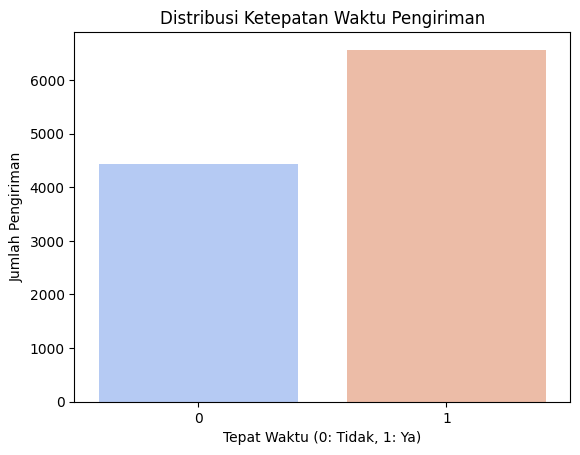

In [29]:
# 1. Distribusi waktu pengiriman (ontime vs late)
sns.countplot(x=df['Reached.on.Time_Y.N'], palette='coolwarm')
plt.title("Distribusi Ketepatan Waktu Pengiriman")
plt.xlabel("Tepat Waktu (0: Tidak, 1: Ya)")
plt.ylabel("Jumlah Pengiriman")
plt.show()

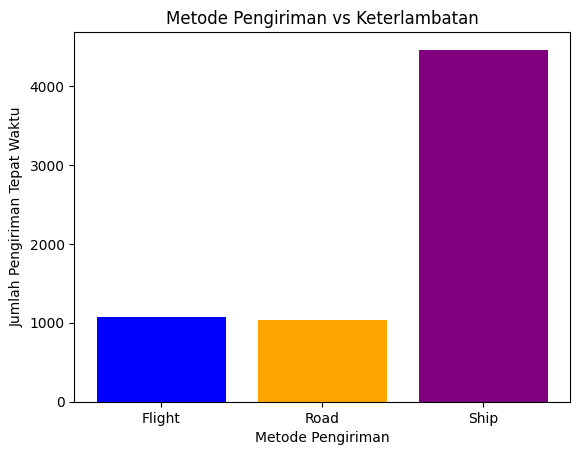

In [30]:
shipment_group = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].sum()
plt.bar(shipment_group.index, shipment_group.values, color=['blue', 'orange', 'purple'])
plt.title("Metode Pengiriman vs Keterlambatan")
plt.xlabel("Metode Pengiriman")
plt.ylabel("Jumlah Pengiriman Tepat Waktu")
plt.show()

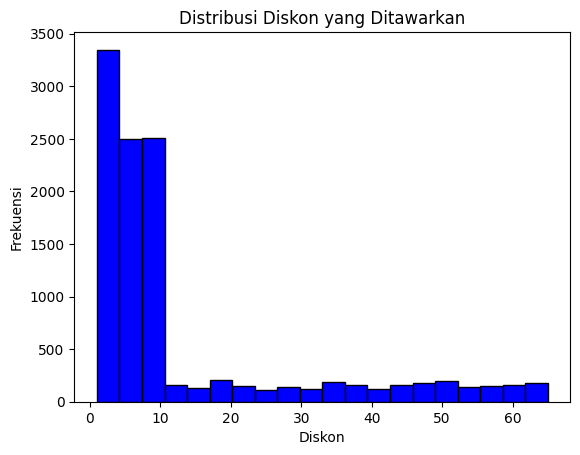

In [33]:
# 3. Distribusi diskon yang ditawarkan
plt.hist(df['Discount_offered'], bins=20, color='blue', edgecolor='black')
plt.title("Distribusi Diskon yang Ditawarkan")
plt.xlabel("Diskon")
plt.ylabel("Frekuensi")
plt.show()

# --- Insight dan Tindakan ---
# 1. Jika mayoritas keterlambatan terjadi pada metode pengiriman tertentu (misalnya 'Ship'), maka dapat dilakukan evaluasi terhadap penyedia layanan tersebut.
# 2. Jika diskon tinggi berhubungan dengan keterlambatan, perusahaan bisa mempertimbangkan strategi baru agar tidak memengaruhi ketepatan waktu pengiriman.
# 3. Analisis Shipping Efficiency dapat membantu dalam mengoptimalkan biaya dan waktu pengiriman untuk meningkatkan kepuasan pelanggan.


In [28]:
# Menyimpan dataset yang telah diproses
df.to_csv("/content/train.csv", index=False)
print("disimpan")

disimpan


SUMBER DATA: https://www.kaggle.com/datasets/prachi13/customer-analytics